In [3]:
import cv2
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

ModuleNotFoundError: No module named 'cv2'

In [14]:
TRAIN = "training_data"

In [107]:
def draw_codes(imgs):
    bd = cv2.barcode.BarcodeDetector()
    qcd = cv2.QRCodeDetector()

    fig, axs = plt.subplots(3, len(imgs) // 3 + 1, figsize=(20, 20))
    for i, img in enumerate(imgs):
        res_img = cv2.imread(img)
        _, data, points, _ = bd.detectAndDecodeMulti(res_img)
        if points is not None:
            for p in points:
                # print(np.array(p, dtype=np.int32))
                res_img = cv2.polylines(res_img, [np.array(p, dtype=np.int32)], True, (0, 255, 0), 3)
            for s, p in zip(data, points):
                res_img = cv2.putText(res_img, s, p[1].astype(int),
                      cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

        _, data, points, _ = qcd.detectAndDecodeMulti(res_img)
        if points is not None:
            for p in points:
                # print(np.array(p, dtype=np.int32))
                res_img = cv2.polylines(res_img, [np.array(p, dtype=np.int32)], True, (0, 255, 0), 3)
            for s, p in zip(data, points):
                res_img = cv2.putText(res_img, s, p[1].astype(int),
                      cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
        axs[i % 3][i // 3].imshow(res_img)
        axs[i % 3][i // 3].set_title(img)

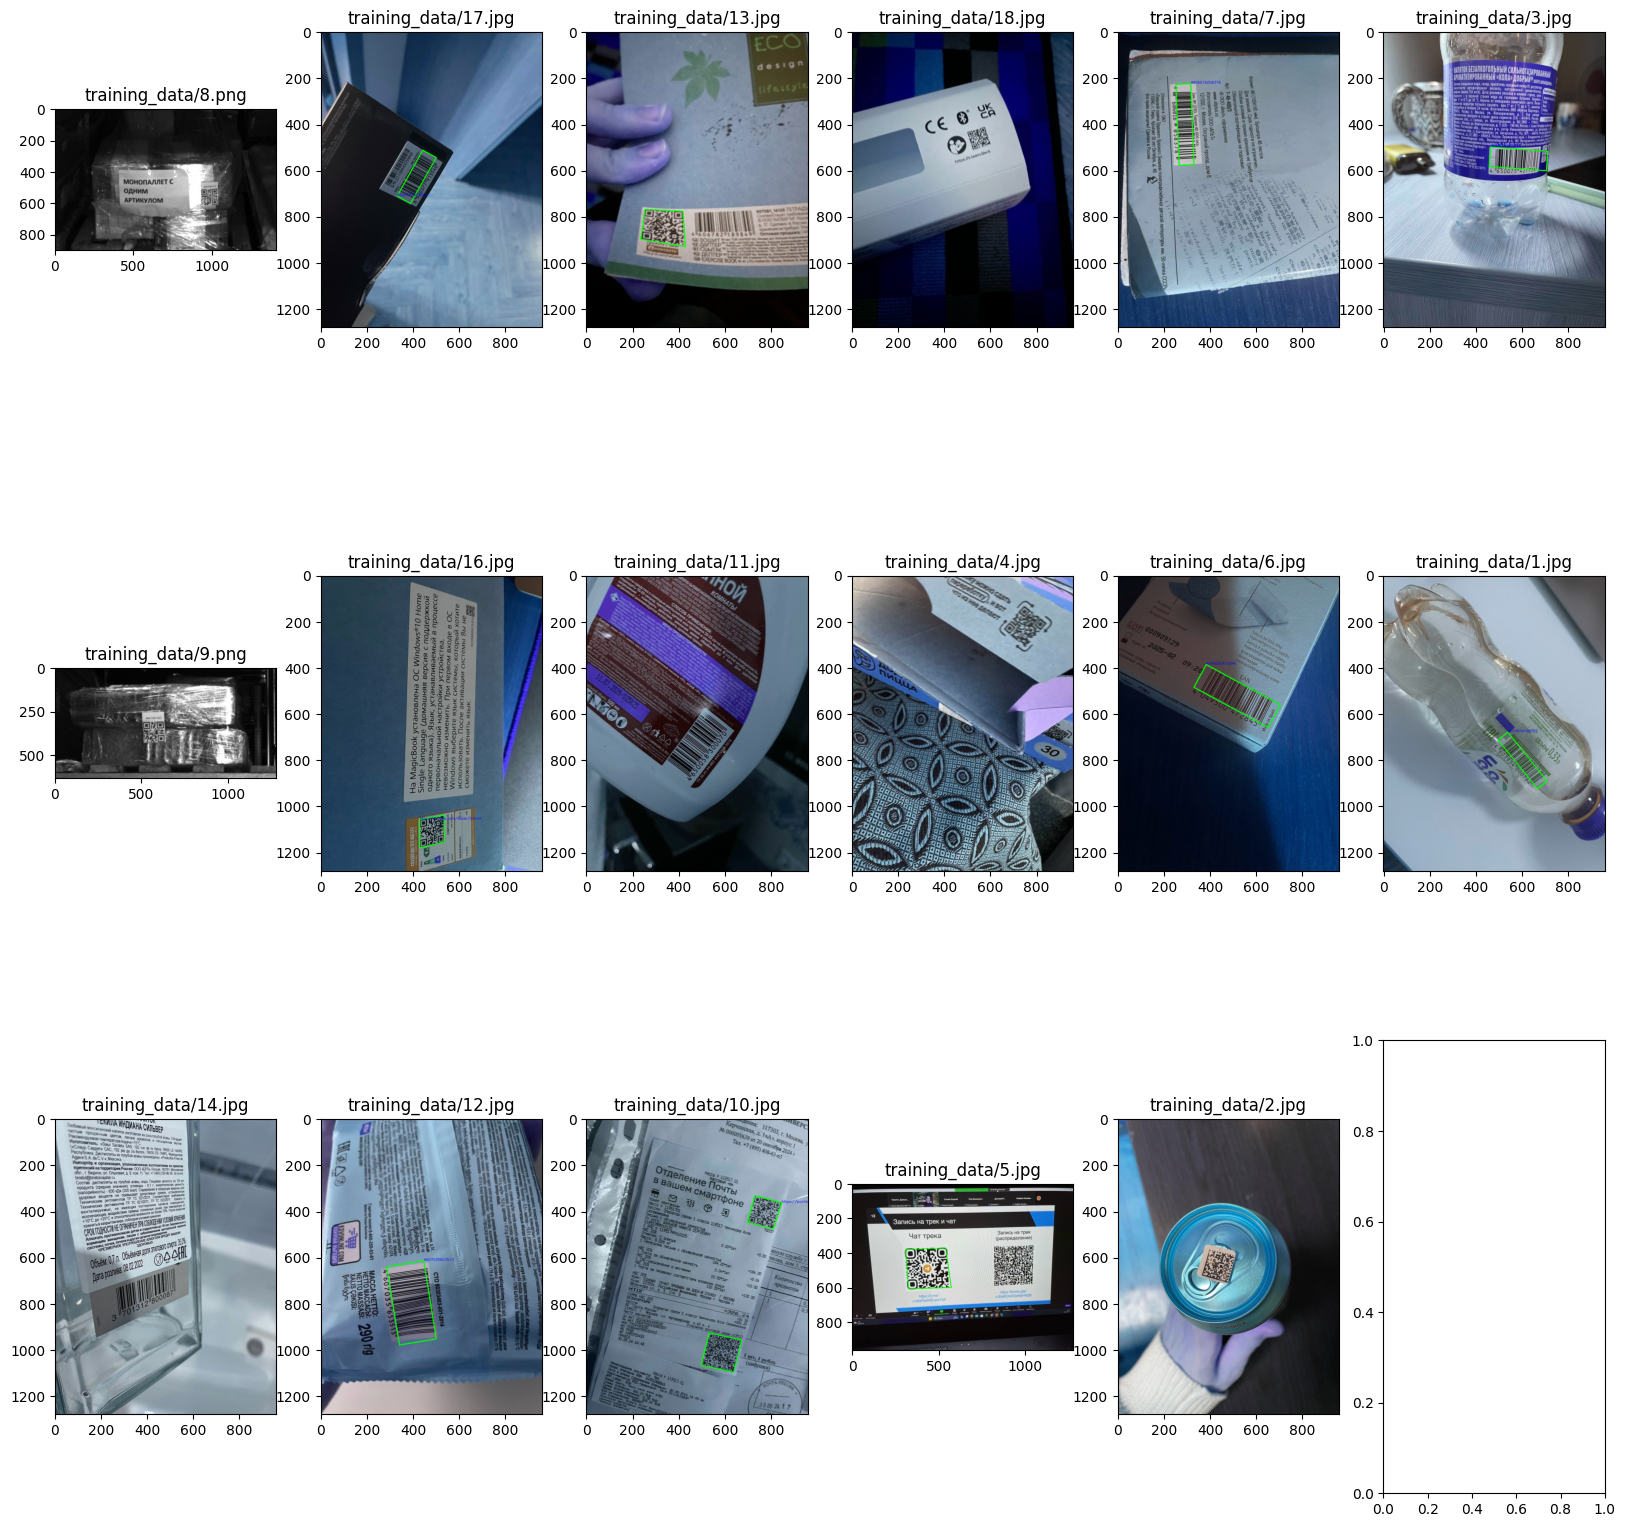

In [108]:
imgs = glob.glob(os.path.join(TRAIN, "*"))
draw_codes(imgs=imgs)